<a href="https://colab.research.google.com/github/Arpit1118/Pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#MNIST Image files into 4-D tensor
transform = transforms.ToTensor()

In [3]:
#Train_data
train_data = datasets.MNIST(root = '/CNN_data', train = True, download = True, transform = transform)

In [4]:
#Test_data
test_data = datasets.MNIST(root = '/CNN_data', train = False, download = True, transform = transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /CNN_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /CNN_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
#Batch size for images
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [8]:
#CNN model
#Convolutional layer and it's functions(2 convolutional layers)
conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1)
conv2 = nn.Conv2d(in_channels = 6, out_channels = 18, kernel_size = 3, stride = 1)

In [9]:
 #Grab 1 MNIST image
 for i, (X_train, y_train) in enumerate(train_data):
    break

In [10]:
X_train.shape

torch.Size([1, 28, 28])

In [11]:
x = X_train.view(1,1,28,28)

In [12]:
#First Convolution
x = F.relu(conv1(x))

In [13]:
x.shape

torch.Size([1, 6, 26, 26])

In [14]:
#Pooling layer
x= F.max_pool2d(x, 2, 2)

In [15]:
x.shape

torch.Size([1, 6, 13, 13])

In [16]:
#Second convolution
x = F.relu(conv2(x))

In [17]:
x.shape

torch.Size([1, 18, 11, 11])

In [18]:
#Pooling layer
x= F.max_pool2d(x, 2, 2)

In [19]:
x.shape

torch.Size([1, 18, 5, 5])

In [20]:
#Model Class
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,18,3,1)
    self.fc1 = nn.Linear(5*5*18,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    #Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    #Flatten
    X = X.view(-1, 5*5*18)
    #Fully Connected Layer
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim = 1)

In [21]:
#Instance of our Model
torch.manual_seed(41)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=450, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [23]:
import time
start_time = time.time()
# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For loop for epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b, (X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      ts_corr = (predicted == y_test).sum()
      tst_corr += ts_corr
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.2091941386461258
Epoch: 0  Batch: 1200  Loss: 0.10075223445892334
Epoch: 0  Batch: 1800  Loss: 0.06770558655261993
Epoch: 0  Batch: 2400  Loss: 0.35161882638931274
Epoch: 0  Batch: 3000  Loss: 0.012762648053467274
Epoch: 0  Batch: 3600  Loss: 0.00493888184428215
Epoch: 0  Batch: 4200  Loss: 0.09895820170640945
Epoch: 0  Batch: 4800  Loss: 0.07172201573848724
Epoch: 0  Batch: 5400  Loss: 0.07192467153072357
Epoch: 0  Batch: 6000  Loss: 0.015256628394126892
Epoch: 1  Batch: 600  Loss: 0.31440412998199463
Epoch: 1  Batch: 1200  Loss: 0.03081408143043518
Epoch: 1  Batch: 1800  Loss: 0.0030768844299018383
Epoch: 1  Batch: 2400  Loss: 0.002297267084941268
Epoch: 1  Batch: 3000  Loss: 0.055992286652326584
Epoch: 1  Batch: 3600  Loss: 0.2936374843120575
Epoch: 1  Batch: 4200  Loss: 0.029877090826630592
Epoch: 1  Batch: 4800  Loss: 0.018673624843358994
Epoch: 1  Batch: 5400  Loss: 0.00258409115485847
Epoch: 1  Batch: 6000  Loss: 0.07790756970643997
Epoch: 2  Batch:

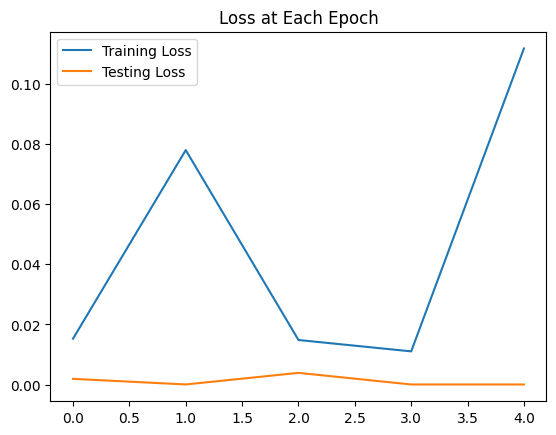

In [24]:
#Graph the loss at each epoch
train_losses = [tl1.item() for tl1 in train_losses]
test_losses = [tl2.item() for tl2 in test_losses]
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Testing Loss')
plt.title('Loss at Each Epoch')
plt.legend()

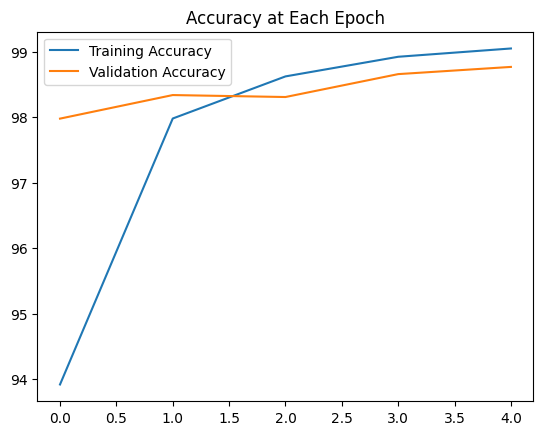

In [25]:
#graph the accuracy at each epoch
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at Each Epoch")
plt.legend()

In [26]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [27]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [28]:
correct.item()/len(test_data)*100

98.77

In [29]:
test_data[1111][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

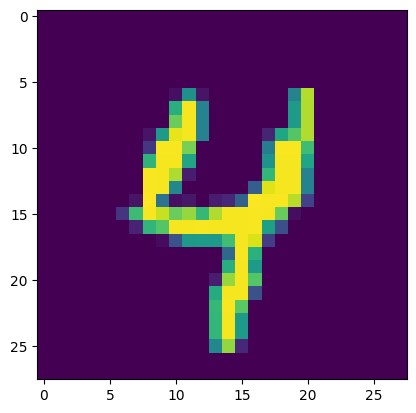

In [30]:
plt.imshow(test_data[1111][0].reshape(28,28))

In [31]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1111][0].view(1,1,28,28))

In [32]:
new_prediction

tensor([[-2.0735e+01, -1.2848e+01, -1.4378e+01, -2.2535e+01, -7.8198e-05,
         -2.0922e+01, -1.4597e+01, -1.0993e+01, -1.2954e+01, -9.8030e+00]])

In [33]:
new_prediction.argmax()

tensor(4)